<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/L'Algorithme_de_Dijkstra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L'Algorithme de Dijkstra**

Voici un exercice qui vous permettra de vous exercer sur la pratique d'optimisation.

L'Algorithme de Dijkstra sert à résoudre le problème du **plus court chemin** dans un **graphe pondéré** (orienté ou non orienté). Il permet, par exemple, de déterminer un plus court chemin pour se rendre d'une ville à une autre connaissant le réseau routier d'une région. Plus précisément, il calcule des plus courts chemins à partir d'une source vers tous les autres sommets dans un graphe orienté pondéré par des réels positifs. On peut aussi l'utiliser pour calculer un plus court chemin entre un sommet de départ et un sommet d'arrivée.

Cet algorithme est de **complexité polynomiale**. Plus précisément, pour *n* sommets et *a* arêtes, le temps est en *O(a+n.log(n)*.

Nous disposons des paramètres suivants :
- *D*, un graphe stocké sous la forme d'un dictionnaire de dictionnaires pour pouvoir pondérer les arêtes:

In [ ]:
D = {'A': {'B': {'weight' : 12.3}},
     'B': {'F' : {'weight' : 6.1}},
     'C': {'D' : {'weight' : 4.2}, 'E' : {'weight' : 17.0}, 'F' : {'weight' : 9.8}},
     'D': {'E': {'weight' : 3.3}},
     'E': {},
     'F': {'G': {'weight' : 6.2}, 'A' : {'weight' : 14.5}},
     'G': {'D' : {'weight' : 10.6}}}

## **Représentation graphique du graphe**

Importons les modules nécessaires pour pouvoir visualiser le graphe.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.


In [ ]:
import sys  
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user networkx

Voici un affichage graphique de notre graphe.

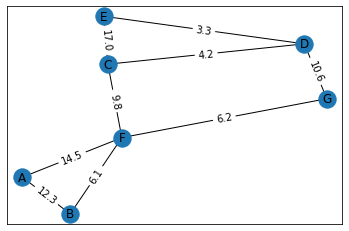

In [ ]:
G = nx.Graph(D) 

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

## **Manipulation du graphe**

Recréons D à partir du graphe G qui n'est pas orienté :

In [ ]:
D = nx.to_dict_of_dicts(G)
for i in D:
  print(i,':',D[i])

A : {'B': {'weight': 12.3}, 'F': {'weight': 14.5}}
B : {'A': {'weight': 12.3}, 'F': {'weight': 6.1}}
C : {'D': {'weight': 4.2}, 'E': {'weight': 17.0}, 'F': {'weight': 9.8}}
D : {'C': {'weight': 4.2}, 'E': {'weight': 3.3}, 'G': {'weight': 10.6}}
E : {'C': {'weight': 17.0}, 'D': {'weight': 3.3}}
F : {'B': {'weight': 6.1}, 'C': {'weight': 9.8}, 'G': {'weight': 6.2}, 'A': {'weight': 14.5}}
G : {'F': {'weight': 6.2}, 'D': {'weight': 10.6}}


Pour manipuler notre dictionnaire, on observe que *D['A']* nous donne le dictionnaire des voisins du sommet 'A'

In [ ]:
print(D['A'])

{'B': {'weight': 12.3}, 'F': {'weight': 14.5}}


Si on souhaite accéder au poids d'une arête, on écrit :

In [ ]:
print(D['A']['F']['weight'])

14.5


Pour savoir s'il existe une arête reliant deux sommets, on écrit :

In [ ]:
print('X' in D['A'])
print('F' in D['A'])

False
True


Pour savoir si un sommet est présent, on écrit :

In [ ]:
print('A' in D)
print('X' in D)

True
False


## **Résolution du problème**

Pour résoudre le poblème, nous allons utiliser une File *queue* à laquelle nous allons ajouter les sommets à parcourir, et réaliser un parcours en profondeur.

Pour chaque sommet, nous allons stocker le plus court chemin qui permet de l'atteindre dans un dictionnaire *distance*.

Lorsque l'on traite un sommet qui n'a pas été traité ou pour lequel nous obtenons un chemin plus cours, nous mettons à jour *distance*.

In [ ]:
def dijkstra(graph, debut):
  queue = [debut]
  distance = {debut: 0}
  while queue:
    t = queue.pop(0)
    for voisin in graph[t]:
      if voisin not in distance :
        queue.append(voisin)
      nouvelle_distance = distance[t] + graph[t][voisin]['weight']
      if(voisin not in distance or nouvelle_distance < distance[voisin]):
        distance[voisin] = nouvelle_distance
  return distance

debut = 'A'
print('Distances entre le sommet',debut,'et les autres sommets du graphe :',dijkstra(D,debut))

Distances entre le sommet A et les autres sommets du graphe : {'A': 0, 'B': 12.3, 'F': 14.5, 'C': 24.3, 'G': 20.7, 'D': 28.5, 'E': 31.8}


Cet algorithme permet de connaître le plus court chemin entre deux poins.


In [ ]:
debut = 'A'
fin = 'E'
print('Distance entre',debut,'et',fin,':',dijkstra(D,debut)[fin])

Distance entre A et E : 31.8


il est aussi possible de résoudre le problème avec une fonction du module networkx.

In [ ]:
debut = 'A'
print('Distances entre le sommet',debut,'et les autres sommets du graphe :',nx.shortest_path_length(G,debut,weight='weight'))

Distances entre le sommet A et les autres sommets du graphe : {'A': 0, 'B': 12.3, 'F': 14.5, 'G': 20.7, 'C': 24.3, 'D': 28.5, 'E': 31.8}
